In [14]:
import sys

sys.path.insert(0,'./')
from importlib import reload

In [15]:
from kappa_cl import *
from fisher import *

In [25]:
zmin=0.1
zmax=2
z=np.linspace(0,5,200)
pzs=lsst_zsource(z=z)
x=z<zmax
x*=z>zmin
z=z[x]
pzs=pzs[x]

nbins=2
zs_bins=np.linspace(zmin,zmax,nbins+1)
nbins=3
#zl_bins=[0.001]#
zl_bins=np.linspace(zmin,zmax-0.2,nbins+1)
lmax_cl=5000
lmin_cl=2
l_step=1
l=np.arange(lmin_cl,lmax_cl,step=l_step)
l0=np.arange(lmin_cl,lmax_cl)
#l_bins=np.int64(np.linspace(lmin_cl,lmax_cl,20))#
lmin_clB=lmin_cl+10
lmax_clB=lmax_cl-100
Nl_bins=40
l_bins=np.int64(np.logspace(np.log10(lmin_clB),np.log10(lmax_clB),Nl_bins))
lb=np.sqrt(l_bins[1:]*l_bins[:-1])
if l_step!=1:
    l=np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20)))

do_cov=True
bin_cl=True

bin_xi=True
theta_bins=np.logspace(np.log10(1./60),1,20)
stack_data=False

ns0=26
ns=ns0*pzs*np.gradient(z)+np.inf

In [17]:
import kappa_cl
reload(kappa_cl)
from kappa_cl import *

In [ ]:
kappa0=Kappa(zs={0:[1]},pzs={0:[1]},lens_weight=False,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0,
               stack_data=stack_data,SSV_cov=True,tidal_SSV_cov=True,ns={0:[26]},f_sky=0.35)
kappa1=Kappa(zs={0:[1]},pzs={0:[1]},lens_weight=False,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l,
               stack_data=stack_data,SSV_cov=True,tidal_SSV_cov=True,ns={0:[26]},f_sky=0.35)

# l are different in kappa0 and kappa1. To test if we can get aways with computation at fewer l, when binning
# with l_bins. Remeber, cl and cov are computed at some l first and then binned.

CPU times: user 28.6 ms, sys: 4.26 ms, total: 32.9 ms
Wall time: 20.2 ms
CPU times: user 11.4 ms, sys: 671 µs, total: 12.1 ms
Wall time: 6.11 ms


/Users/Deep/anaconda/envs/py36/lib/python3.6/site-packages/astropy/units/quantity.py:968: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__rtruediv__(other)
/Users/Deep/anaconda/envs/py36/lib/python3.6/site-packages/astropy/units/quantity.py:968: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__rtruediv__(other)


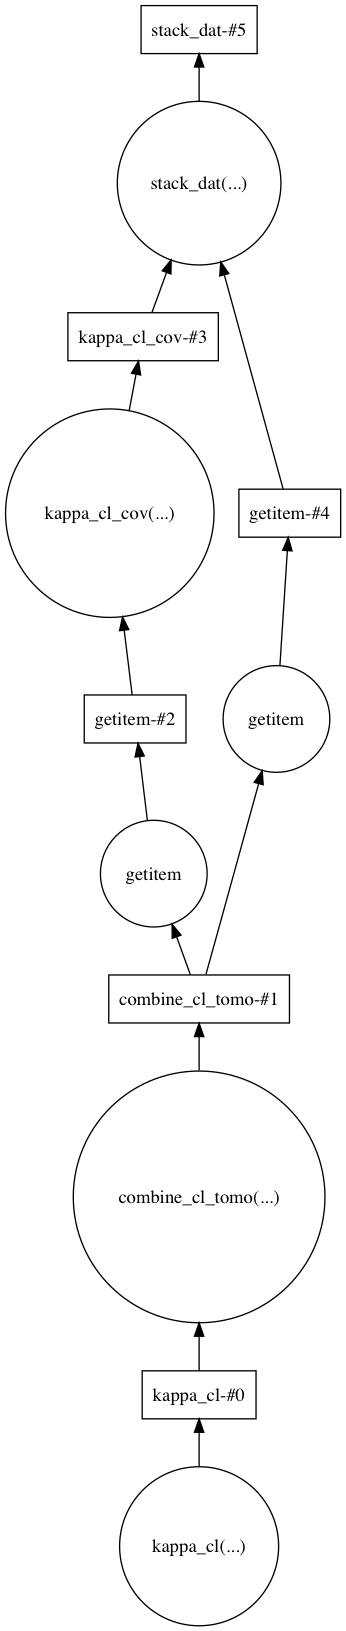

In [5]:
%time cl0G=kappa0.kappa_cl_tomo()
%time cl1G=kappa0.kappa_cl_tomo()#kappa1.kappa_cl_tomo()
cl0G['stack'].visualize()

In [6]:
cl0={}
cl1={}
%time cl0['cl']=cl0G['cl0'].compute()
%time cl0['cov']=kappa0.compute_cov_tomo(cl0G['cov0'])
%time cl1['cl']=cl1G['cl0'].compute()
%time cl1['cov']=kappa1.compute_cov_tomo(cl1G['cov0'])

CPU times: user 6.43 s, sys: 74 ms, total: 6.51 s
Wall time: 6.6 s
CPU times: user 3.99 s, sys: 1.78 s, total: 5.77 s
Wall time: 3.55 s
CPU times: user 4.67 ms, sys: 1.03 ms, total: 5.7 ms
Wall time: 2.19 ms
CPU times: user 3.72 s, sys: 1.5 s, total: 5.22 s
Wall time: 2.8 s


In [10]:
cc=kappa0.cov_utils

/Users/Deep/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


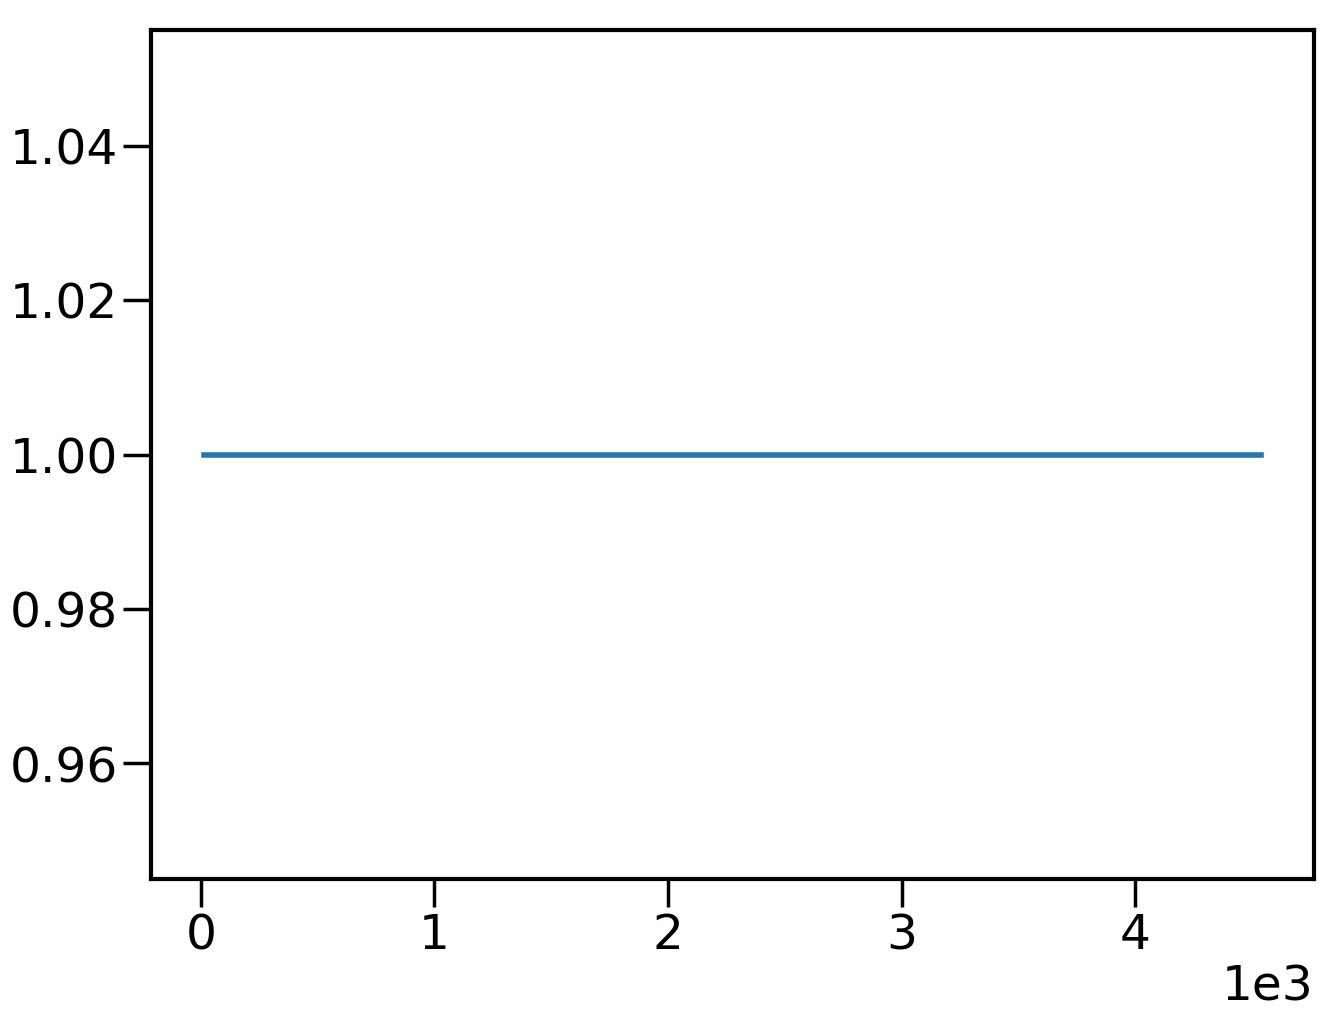

In [11]:
cl_t=cl0['cl'][:,0,0]
cl_t2=cl1['cl'][:,0,0]
plot(lb,cl_t/cl_t2)

# xscale('log')
# ylim(8e-7,8.6e-7)
#yscale('log')

/Users/Deep/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


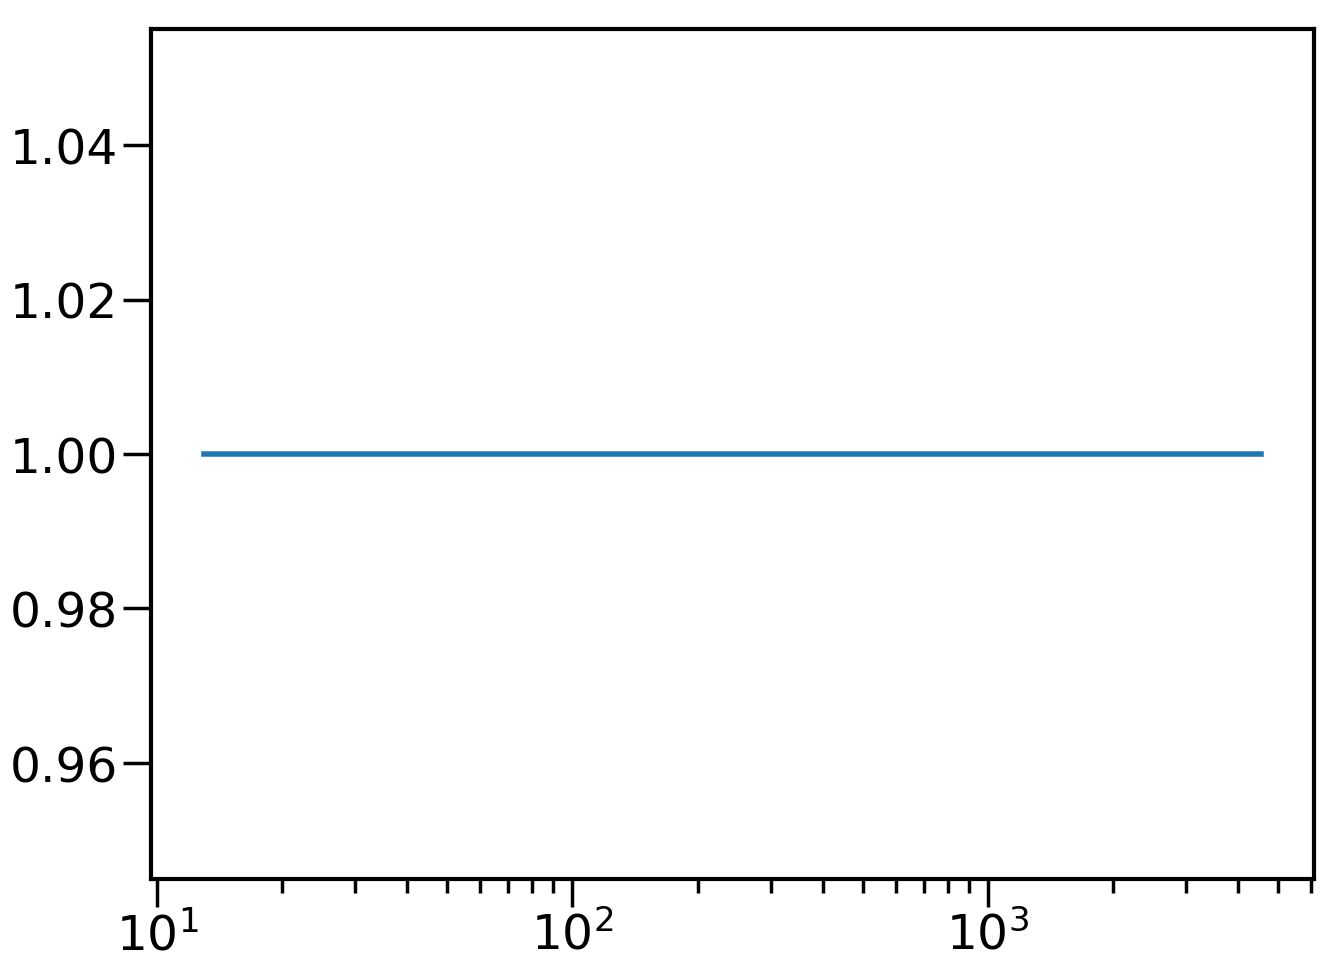

In [12]:
cov0=cl0['cov'][(0,0,0,0)]
cov02=cl1['cov'][(0,0,0,0)]
plot(lb,np.diag(cov02['G'])/np.diag(cov0['G']))
xscale('log')
#ylim(0.99,1.01)

(10, 3000)

/Users/Deep/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


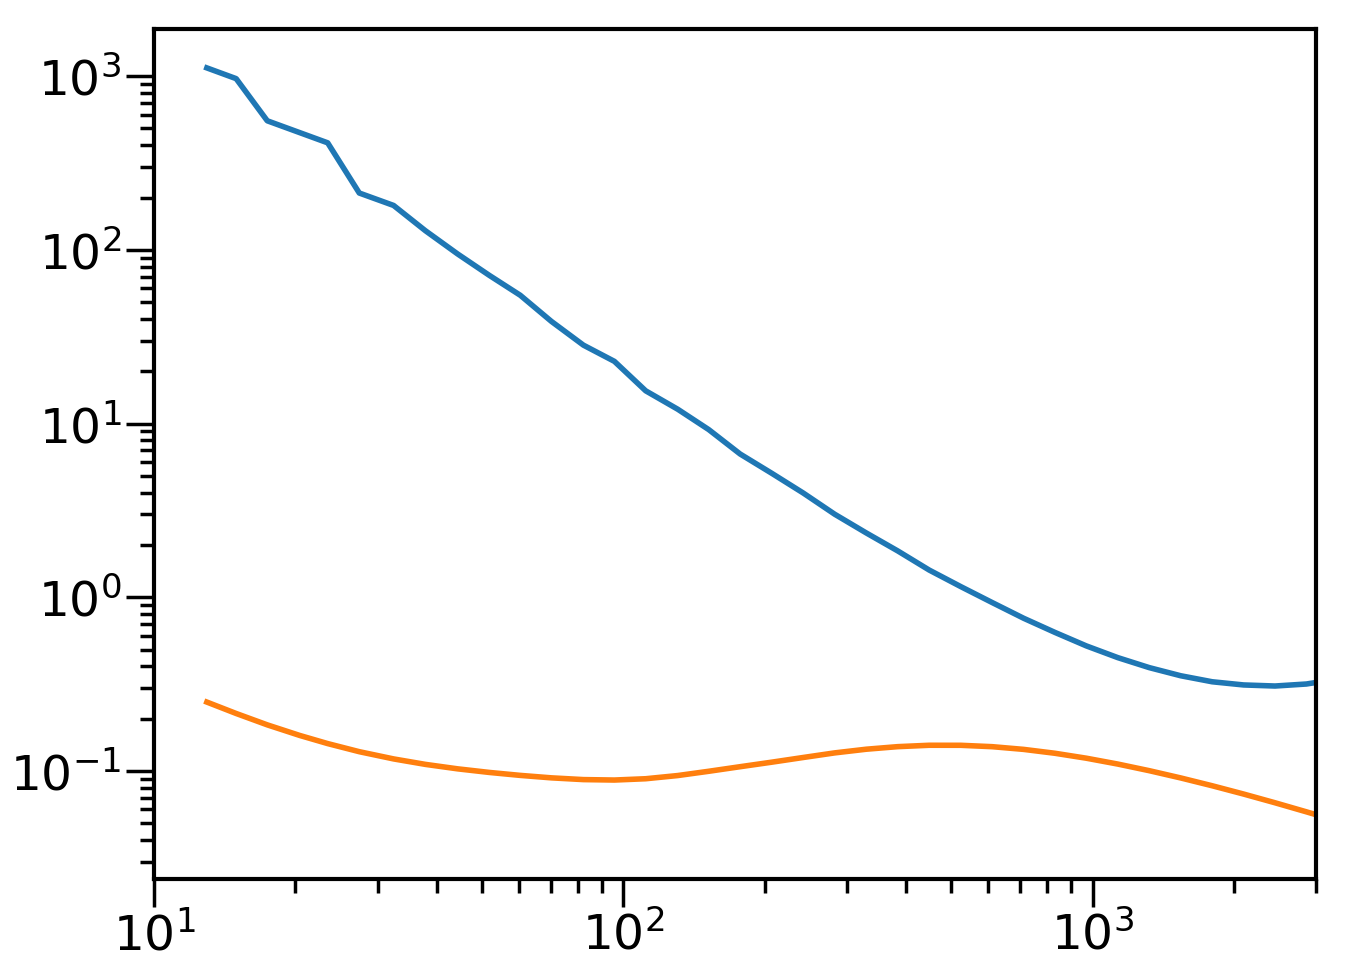

In [13]:
cov0=cl0['cov'][(0,0,0,0)]
f=1.e4
plot(lb,np.diag(cov0['G'])/cl_t**2*f)
#plot(lb,np.diag(cov02['G'])/cl_t**2*f*0.95)
plot(lb,np.diag(cov0['SSC_dd'])/cl_t**2*f)
xscale('log')
yscale('log')
xlim(10,3000)

(12, 4900)

/Users/Deep/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


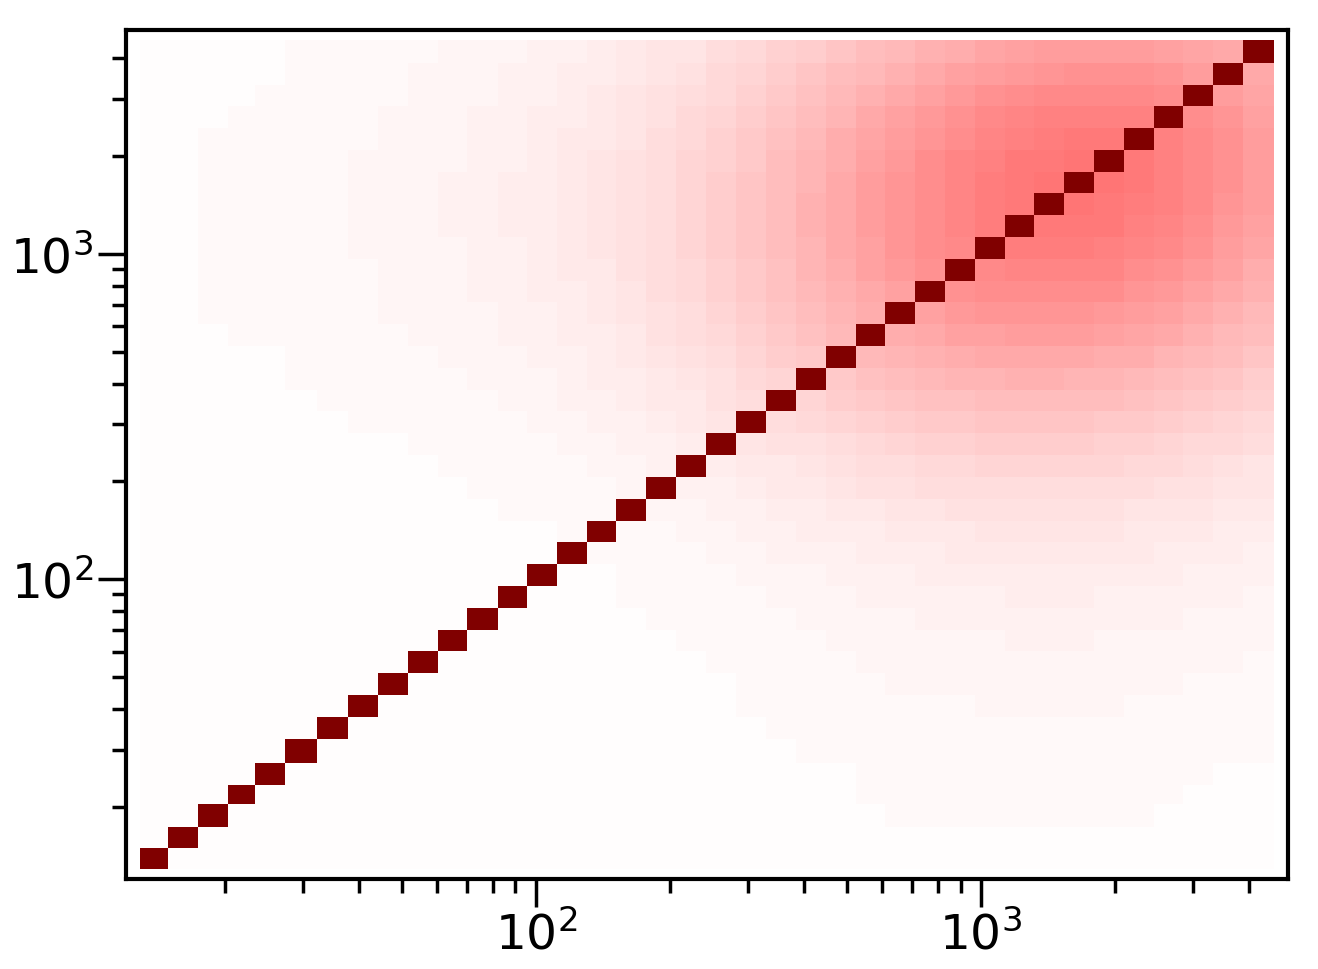

In [14]:
cov0=cl0['cov'][(0,0,0,0)]
corr2=kappa0.cov_utils.corr_matrix(cov0['final'])
pcolor(lb,lb,corr2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
xlim(lmin_clB,lmax_clB)
ylim(lmin_clB,lmax_clB)

In [15]:
np.sum(ns)

inf

In [243]:
import kappa_cl
reload(kappa_cl)
from kappa_cl import *

In [244]:
do_xi=True
bin_xi=True
bin_cl=False
th_bins=np.logspace(-1,1,20)

In [245]:
kappaS = Kappa(zs=z,pzs=pzs,l=l,z_bins=zs_bins,lens_weight=False,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,
               stack_data=stack_data,SSV_cov=False,tidal_SSV_cov=False,ns=ns,do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins)#ns=np.inf)

kappaL = Kappa(zs=z,pzs=pzs,l=l,z_bins=zl_bins,lens_weight=True,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,
               stack_data=stack_data,SSV_cov=False,tidal_SSV_cov=False,ns=ns,do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins)#ns=np.inf)

pruning r, log_space,n_f: True 2
pruned r: 85
nr: 84
pruning r, log_space,n_f: True 2
pruned r: 85
nr: 84


In [246]:
from dask.distributed import Client
client = Client(processes=False)

In [247]:
%time xiSG=kappaS.kappa_xi_tomo()
xiLG=kappaL.kappa_xi_tomo()#kappa_cl_tomo()
%time xiS=xiSG[0]['stack'].compute()
%time xiL=xiLG[0]['stack'].compute()

CPU times: user 39.6 ms, sys: 16.6 ms, total: 56.2 ms
Wall time: 47.3 ms


./binning.py:53: RuntimeWarning: invalid value encountered in true_divide
  xi_b/=bin_utils['norm']
distributed.worker - WARNING -  Compute Failed
Function:  execute_task
args:      ((<bound method Kappa.stack_dat of <kappa_cl.Kappa object at 0x1d44914a8>>, (<class 'dict'>, [['cov', {(0, 0, 0, 0): Delayed('xi_cov-3c1bbfe9-71f8-467e-b5cc-301fed9859ca'), (0, 0, 0, 1): Delayed('xi_cov-ea2d4b48-52bb-4611-8b6f-efd3dd5869e8'), (0, 0, 1, 1): Delayed('xi_cov-2f3af364-a2f7-4ac4-a421-9c545a4eca0c'), (0, 1, 0, 0): Delayed('xi_cov-b452c569-5ec3-4740-8699-86b957aa2435'), (0, 1, 0, 1): Delayed('xi_cov-5525c954-267e-473e-aab6-c13e7c277049'), (0, 1, 1, 1): Delayed('xi_cov-f2065c18-6b5e-4d68-89ce-da409e00f4d1'), (1, 1, 0, 0): Delayed('xi_cov-a670ed62-559b-4c34-9be3-6e709c96336b'), (1, 1, 0, 1): Delayed('xi_cov-869c1852-1d6b-4dcc-a62f-8994765d7333'), (1, 1, 1, 1): Delayed('xi_cov-c4d9490d-e97f-4421-a135-5b295c0c7449')}], ['xi', array([[[             nan,              nan],
        [             nan,    

Delayed('getitem-1c86393e42da55c3efbb1d4aa8ba376c')


ValueError: setting an array element with a sequence.

In [ ]:
xiSG['stack'].visualize()

In [89]:
%time clSG=kappaS.kappa_cl_tomo()
clLG=kappaL.kappa_cl_tomo()#kappa_cl_tomo()
# %time clS=clSG['stack'].compute()
# %time clL=clLG['stack'].compute()

CPU times: user 172 ms, sys: 46.7 ms, total: 219 ms
Wall time: 194 ms


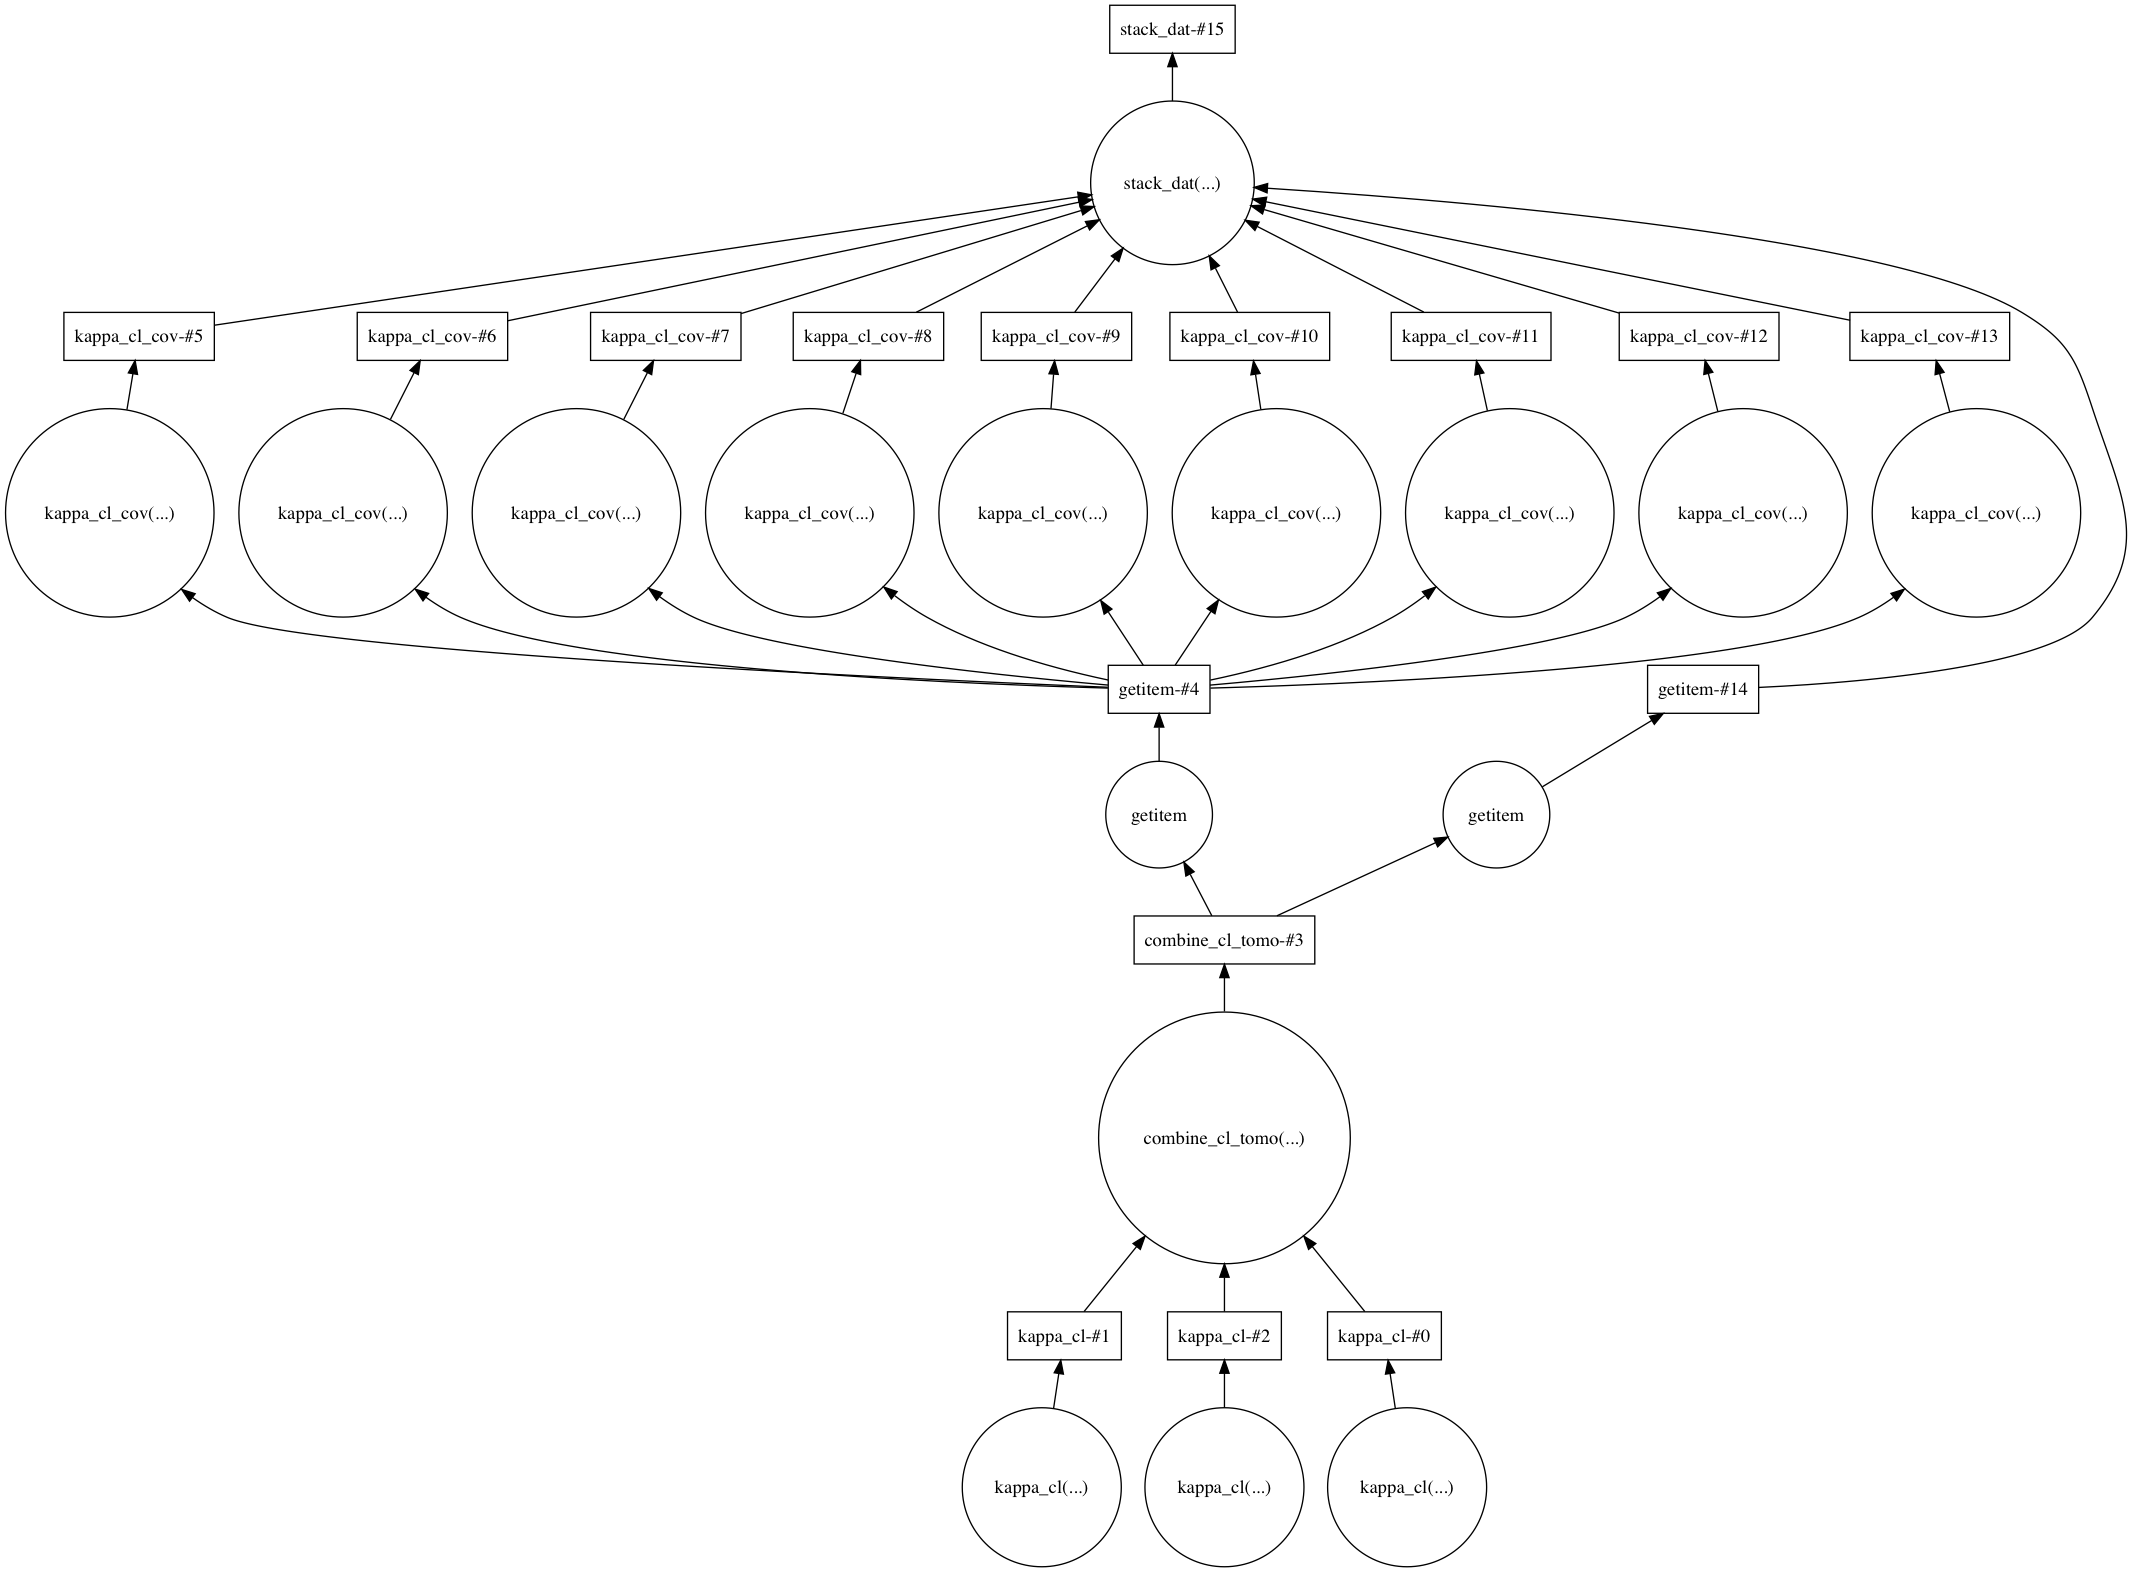

In [90]:
clSG['stack'].visualize()

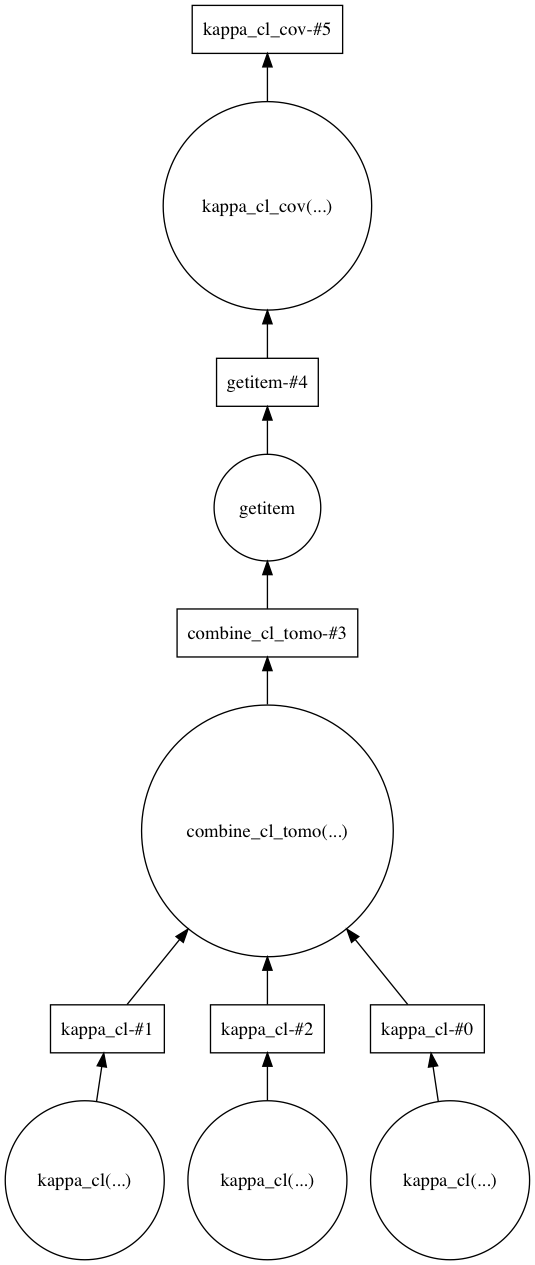

In [31]:
clSG['cov0'][(0,0,0,0)].visualize()

In [32]:
kappaS.SN

array([[[ 0.,  0.],
        [ 0.,  0.]]])

In [33]:
kappaL.SN

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]])

In [34]:
cl_b_stack=clS#kappaS.stack_dat(clS)
cl_Lb_stack=clL#kappaL.stack_dat(clL)
#clstack=kappaS.stack_dat(clS)

In [35]:
covS_inv=np.linalg.inv(cl_b_stack['cov'])
print (np.sqrt(np.dot(cl_b_stack['cl'],np.dot(covS_inv,cl_b_stack['cl']))))
covL_inv=np.linalg.inv(cl_Lb_stack['cov'])
print (np.sqrt(np.dot(cl_Lb_stack['cl'],np.dot(covL_inv,cl_Lb_stack['cl']))))

2677.12540971
3786.86599509


/Users/Deep/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


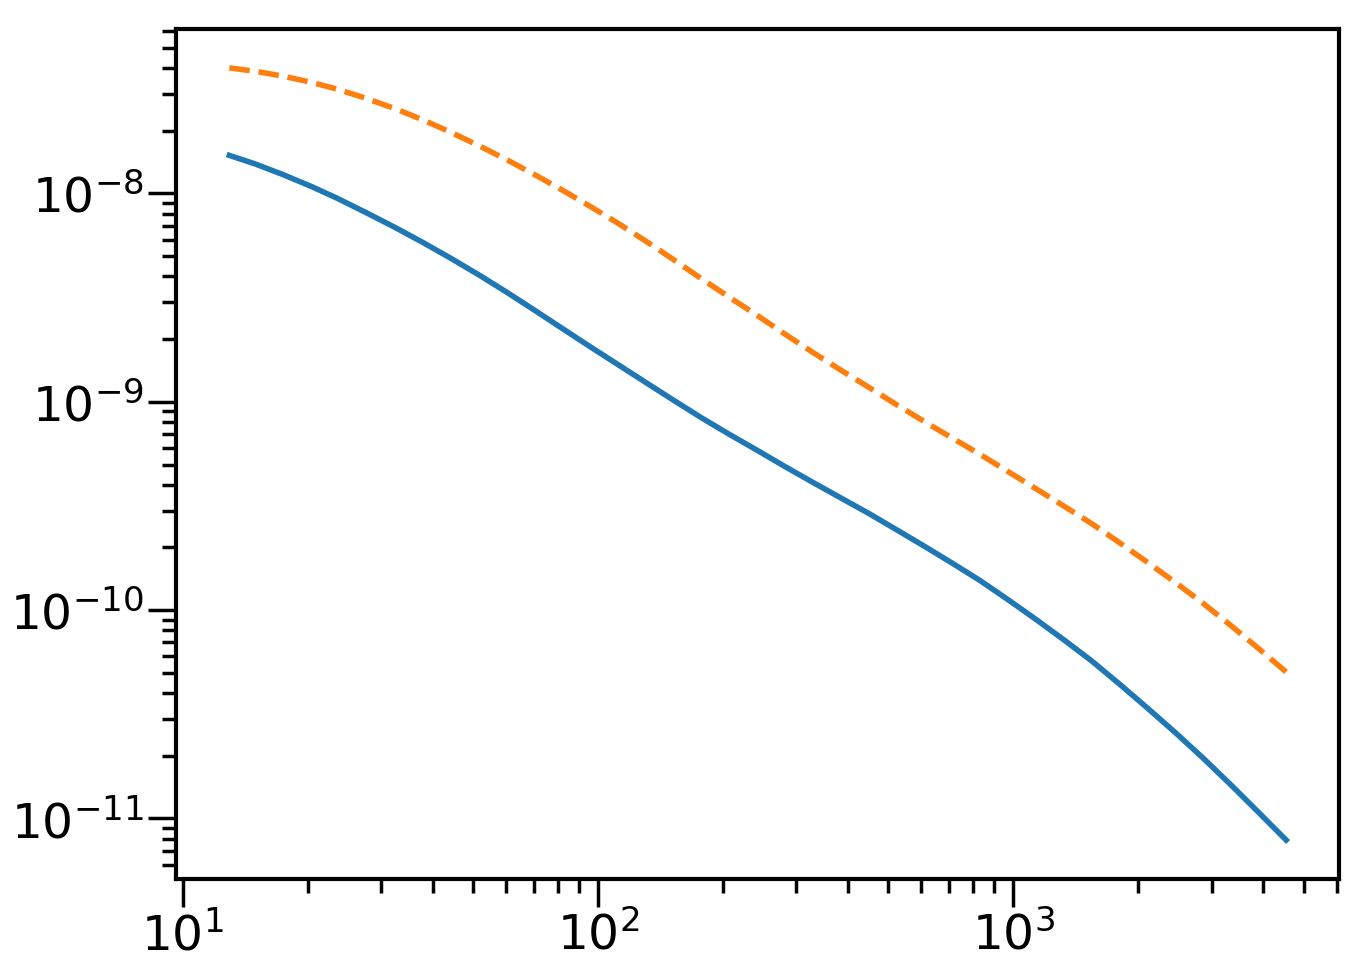

In [36]:
plot(clS['l'],clS['cl'][:,0,0])
#plot(clSb['l'],clSb['cl'][:,0,0])

plot(clL['l'],clL['cl'][:,0,0],ls='--')
# plot(clLb['l'],clLb['cl'][:,0,0])
xscale('log')
yscale('log')

In [21]:
corr=cc.corr_matrix(cl_b_stack['cov'])
corrL=cc.corr_matrix(cl_Lb_stack['cov'])

/Users/Deep/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


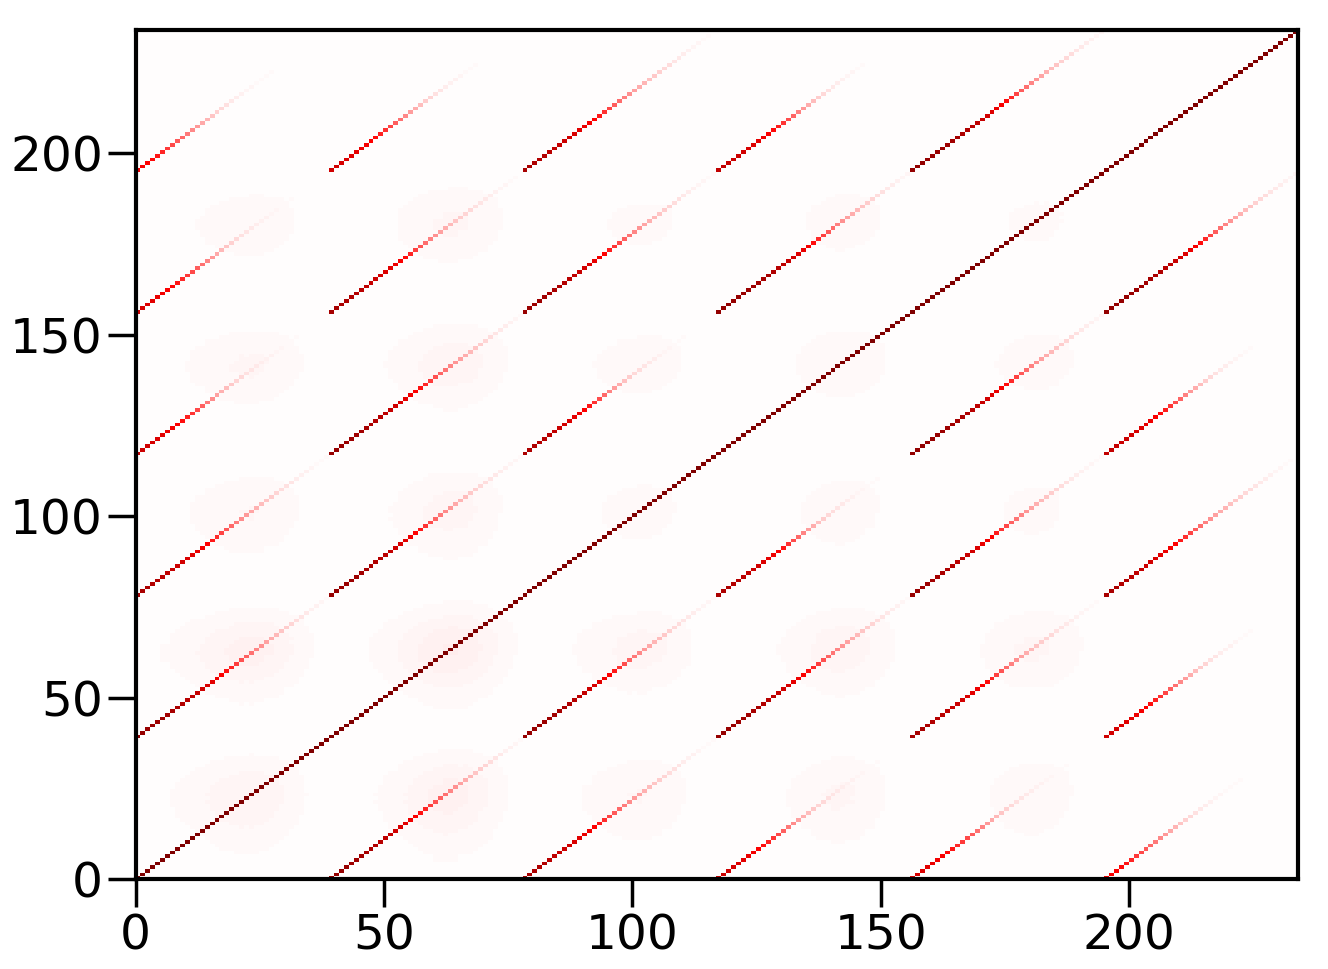

In [22]:
pcolor(corr,vmin=-1,vmax=1,cmap='seismic')

/Users/Deep/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


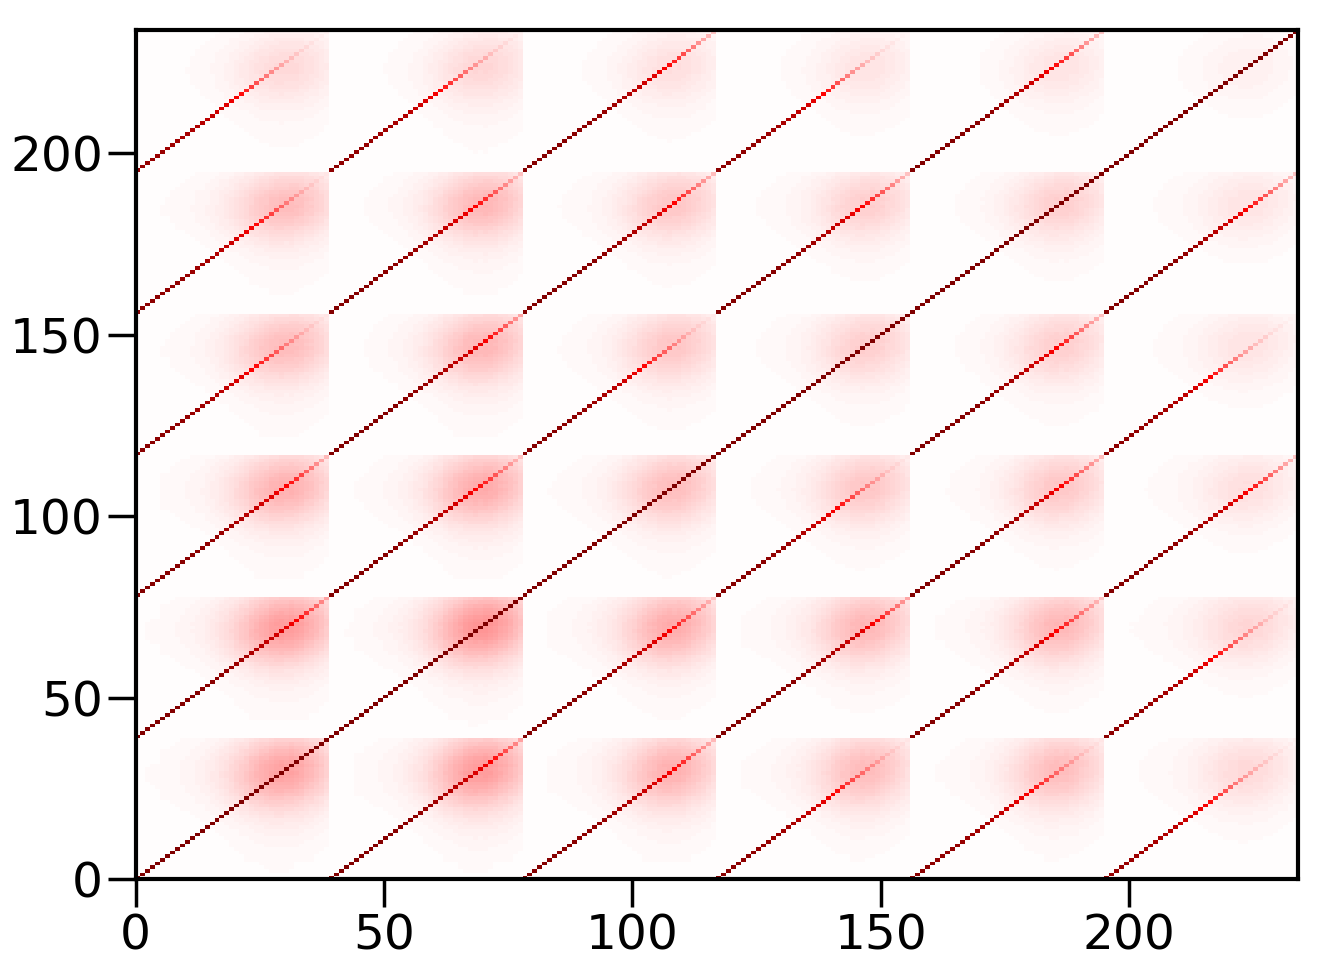

In [23]:
pcolor(corrL,vmin=-1,vmax=1,cmap='seismic')

(10, 3000)

/Users/Deep/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


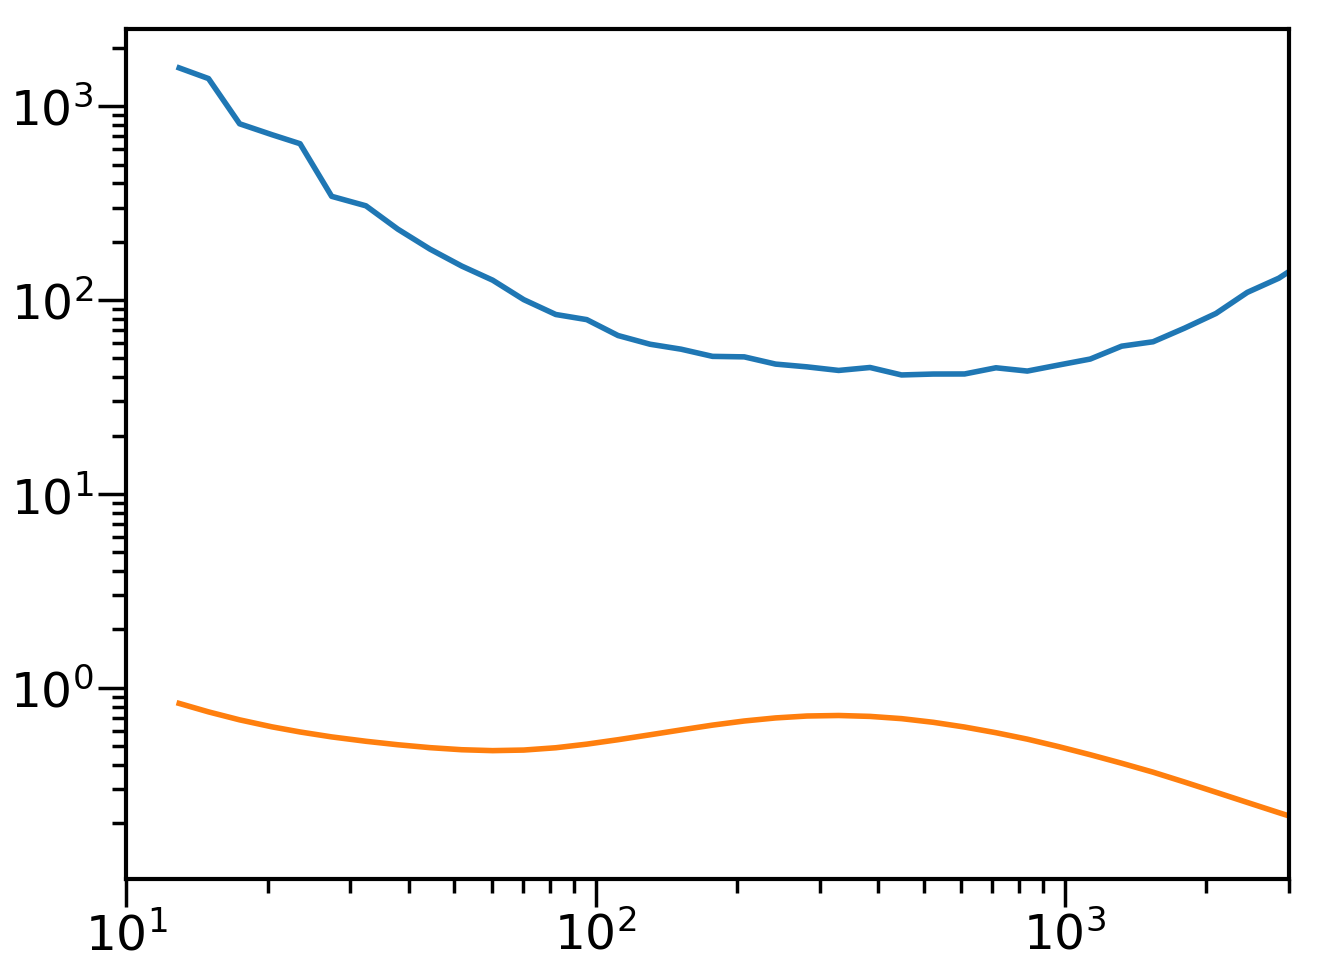

In [24]:
#cov0=clS['cov'][(0,0,0,0)]
f=1.e4
cl00=clSb
cl01=clS
cov0=cl00['cov'][(0,0,0,0)]
cov01=cl01['cov'][(0,0,0,0)]
cl_t=cl00['cl'][:,0,0]
cl_t1=cl01['cl'][:,0,0]
plot(lb,np.diag(cov0['G'])/cl_t**2*f)
plot(lb,np.diag(cov0['SSC_dd'])/cl_t**2*f)
# plot(l,np.diag(cov01['G'])/cl_t1**2*f)
# plot(l,np.diag(cov01['SSC_dd'])/cl_t1**2*f)
xscale('log')
yscale('log')
xlim(10,3000)

/Users/Deep/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


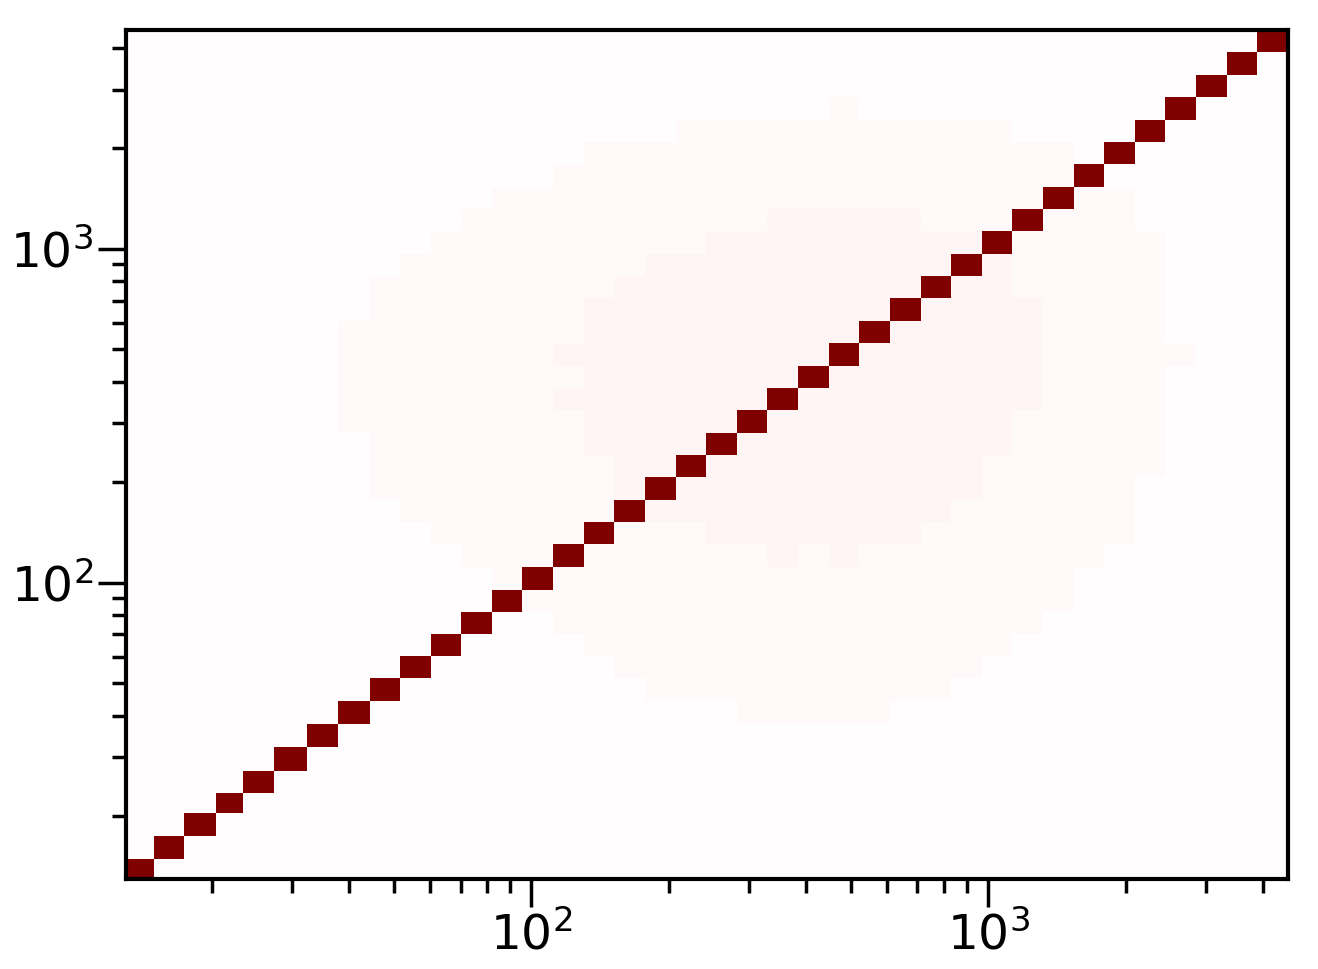

In [25]:
corr2=cc.corr_matrix(cov0['final'])
pcolor(lb,lb,corr2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')

(10, 3000)

/Users/Deep/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


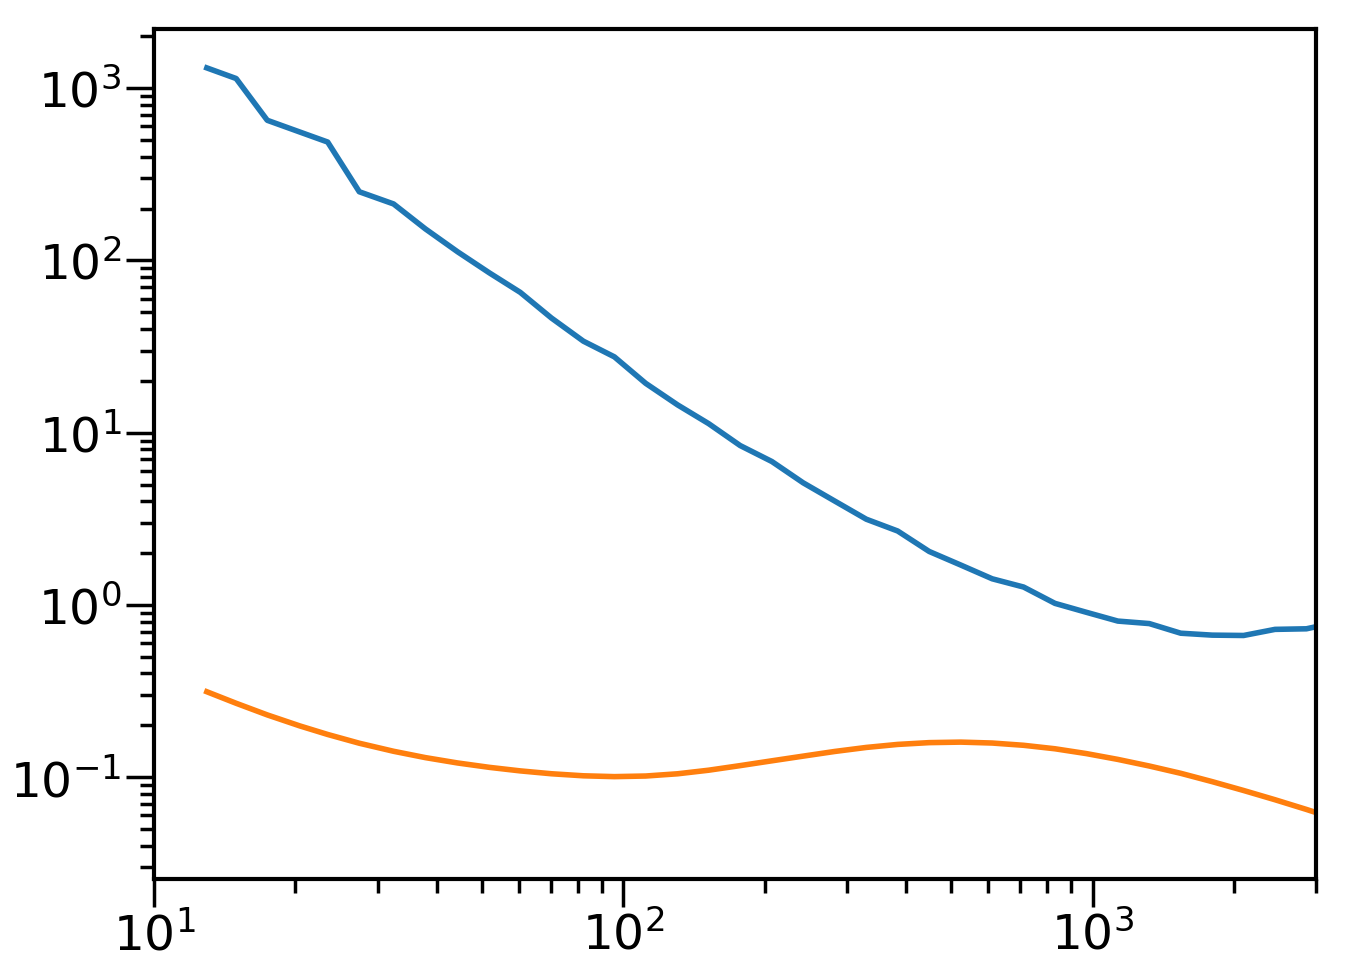

In [26]:
#cov0=clS['cov'][(0,0,0,0)]
f=1.e4
cl00=clLb
cl01=clL
cov0=cl00['cov'][(0,0,0,0)]
cov01=cl01['cov'][(0,0,0,0)]
cl_t=cl00['cl'][:,0,0]
cl_t1=cl01['cl'][:,0,0]
plot(lb,np.diag(cov0['G'])/cl_t**2*f)
plot(lb,np.diag(cov0['SSC_dd'])/cl_t**2*f)
# plot(l,np.diag(cov01['G'])/cl_t1**2*f)
# plot(l,np.diag(cov01['SSC_dd'])/cl_t1**2*f)
xscale('log')
yscale('log')
xlim(10,3000)